___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Comparison-online-movie-score
## Overview
Nowadays, we have a wide range of movies, from sci-fi to fantasy, from action to musical. As a result, Hollywood and directors and other team members invest in scores in the most critical resources like IMDB, RottenTomatos, Metacritic, and... When you choose a movie based on scores, you probably have seen different scores in different resources. In this situation, you are probably confused because each site follows business goals. In this repository and data analysis, I want to compare between each score on these websites.


## Part One: Understanding the Background and Data



### The Data

This project have a data from https://github.com/fivethirtyeight/data/tree/master/fandango.
This is a repo with raw data.
There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**Import any libraries I think will use:**

In [1]:
# IMPORT libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**Run the cell below to read in the fandango_scrape.csv file**

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**Now, Explore the DataFrame Properties and Head.**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Explore the relationship between popularity of a film and its rating.
Create a scatterplot showing the relationship between rating and votes.**

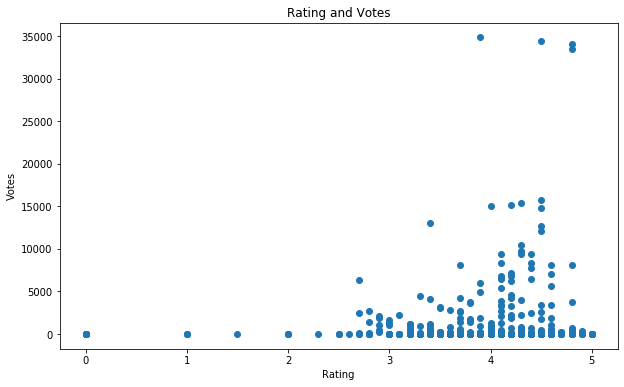

In [6]:
# Create a scatter plot between rating and votes.
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(fandango['RATING'],
           fandango['VOTES'])
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating and Votes');

**Calculate the correlation between the columns:**

In [7]:
# Correlation between columns
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**We know that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [8]:
# Split data from FILM column for year
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)


**How many movies are in the Fandango DataFrame per year?**

In [10]:
fandango['YEAR'].value_counts()

2015)    478
2014)     23
2012)      1
2016)      1
1964)      1
Name: YEAR, dtype: int64

**Visualize the count of movies per year with a plot:**

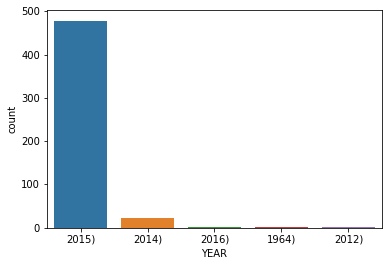

In [11]:
# Visualize
sns.countplot(data = fandango, x = 'YEAR');

**What are the 10 movies with the highest number of votes?**

In [12]:
# TOP 10 Votes
fandango['VOTES'].sort_values(ascending=False)[:10]

0    34846
1    34390
2    34085
3    33538
4    15749
5    15337
6    15205
7    14998
8    14846
9    13055
Name: VOTES, dtype: int64

In [13]:
# OR We can use this method:
fandango.nlargest(n = 10, columns='VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


**How many movies have zero votes?**

In [14]:
# Movies with zero score
fandango['VOTES'].value_counts()

0       69
1       35
4       22
2       19
5       15
        ..
235      1
1258     1
3815     1
4493     1
1196     1
Name: VOTES, Length: 210, dtype: int64

In [15]:
fandango['VOTES'].value_counts()[0]

69

**Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [16]:
#CODE HERE
fandango_plus = fandango[fandango["VOTES"]>0]
fandango_plus

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015)
431,The Intern (2015),5.0,5.0,1,2015)
432,The Park Bench (2015),5.0,5.0,1,2015)
433,The Wanted 18 (2015),5.0,5.0,1,2015)


In [17]:
fandango_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [18]:
fandango_plus['RATING'].dtype

dtype('float64')

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**In this step, I Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

In [19]:
sns.__version__

'0.11.2'

**Important point: I have conflit with seaborn version 0.10. In this version I have a value error:**
`could not convert string to float: 'Fifty Shades of Grey (2015)'` **and I had to upgrade my seaborn version to 0.11.2.**

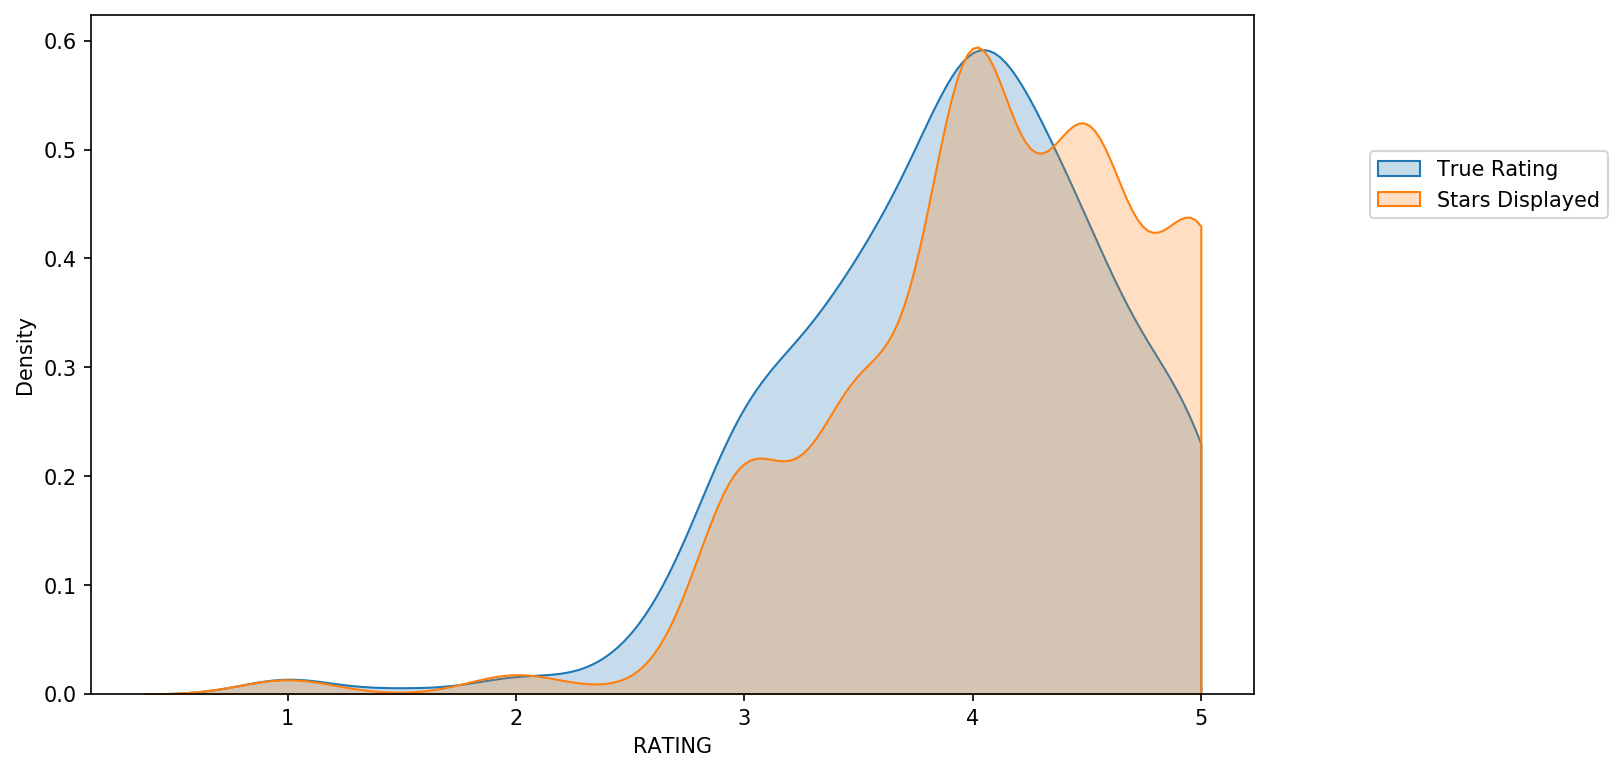

In [20]:
# Create KDE plots

plt.figure(figsize = (10, 6), dpi = 150)
sns.kdeplot(data=fandango_plus, x='RATING', clip = [0, 5], fill = True, label = 'True Rating')
sns.kdeplot(data=fandango_plus, x='STARS', clip = [0, 5], fill = True, label = 'Stars Displayed');
plt.legend(loc = (1.1, 0.7));

**Now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [21]:
# Diffrences between Stars and Rating 
fandango_plus['DIFF_Stars_Rating']= fandango_plus['STARS'] - fandango_plus['RATING']
fandango_plus['DIFF_Stars_Rating'] = fandango_plus['DIFF_Stars_Rating'].round(2)
fandango_plus

/home/farzin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/farzin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FILM,STARS,RATING,VOTES,YEAR,DIFF_Stars_Rating
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


**Create a count plot to display the number of times a certain difference occurs:**

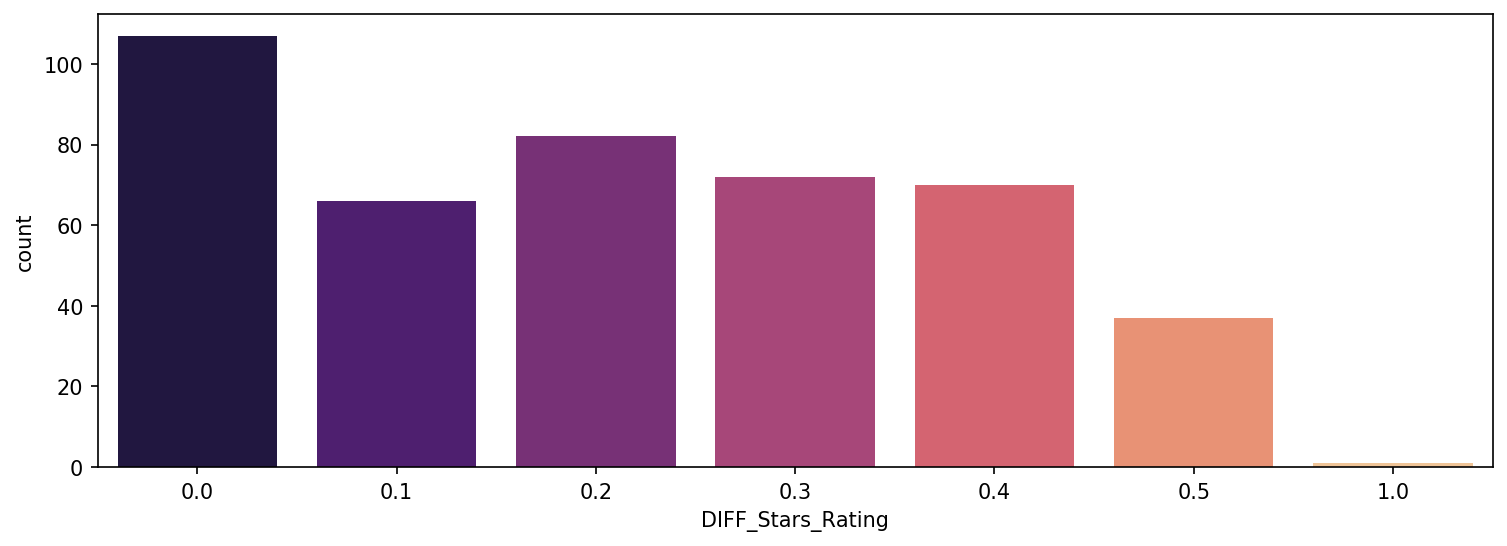

In [22]:
#Create Count plot
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data = fandango_plus, x = 'DIFF_Stars_Rating', palette = 'magma');

**I want to see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [23]:
# Movies with >=1 diff
fandango_plus[fandango_plus['DIFF_Stars_Rating'] >= 1]

,FILM,STARS,RATING,VOTES,YEAR,DIFF_Stars_Rating
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**First: Read in the "all_sites_scores.csv" file by running the cell below**

In [24]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Next: Explore the DataFrame columns, info, description.**

In [25]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [26]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [27]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

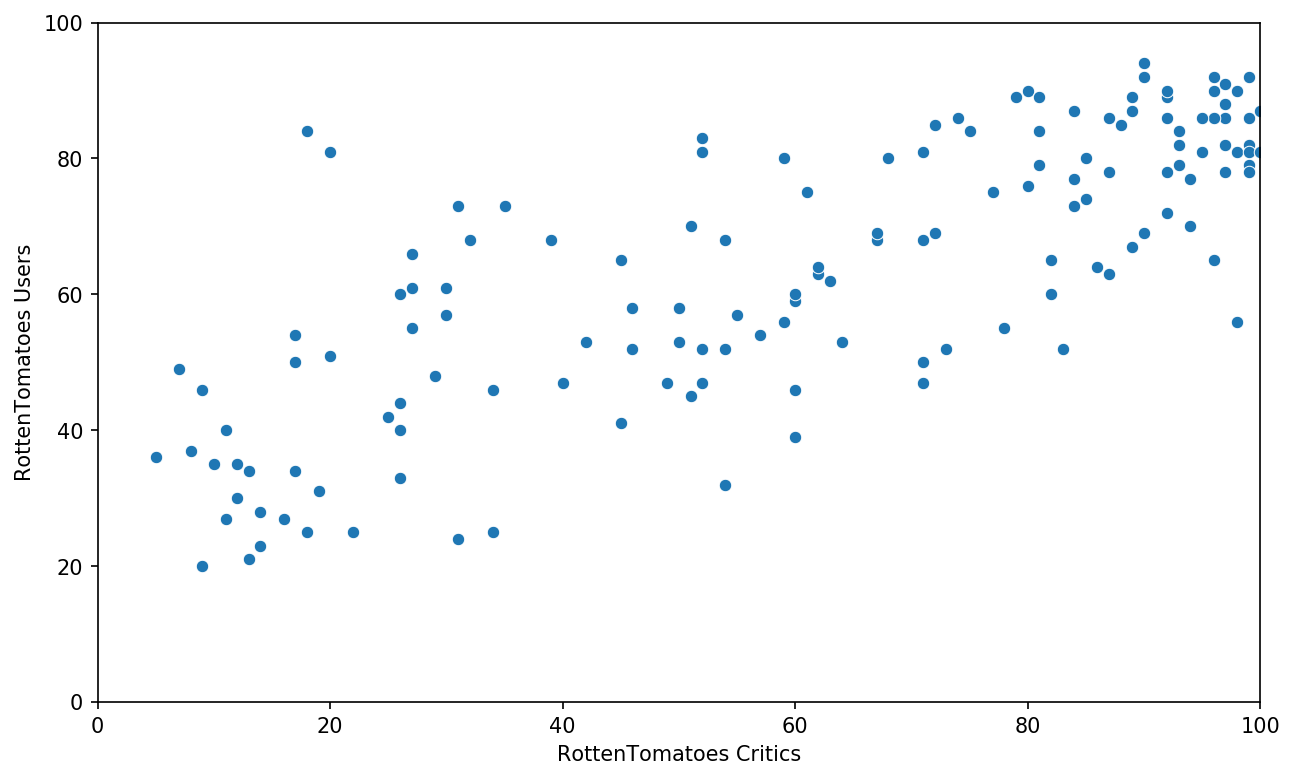

In [28]:
# Sctarrer plot Rotten Tomatos Critics and Reviwers relationship 
plt.figure(figsize = (10, 6), dpi = 150)
sns.scatterplot(x = 'RottenTomatoes', y = 'RottenTomatoes_User', data = all_sites)

plt.xlabel('RottenTomatoes Critics')
plt.ylabel('RottenTomatoes Users')
plt.xlim(0, 100)
plt.ylim(0, 100);

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**I wan to Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [29]:
# Difference between critics ratings and users ratings for Rotten Tomatoes

all_sites['diff_crtics_users'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [30]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_crtics_users
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [31]:
# Mean Absolute diff_crtics_users
all_sites['diff_crtics_users'].apply(abs).mean()

15.095890410958905

**Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.**

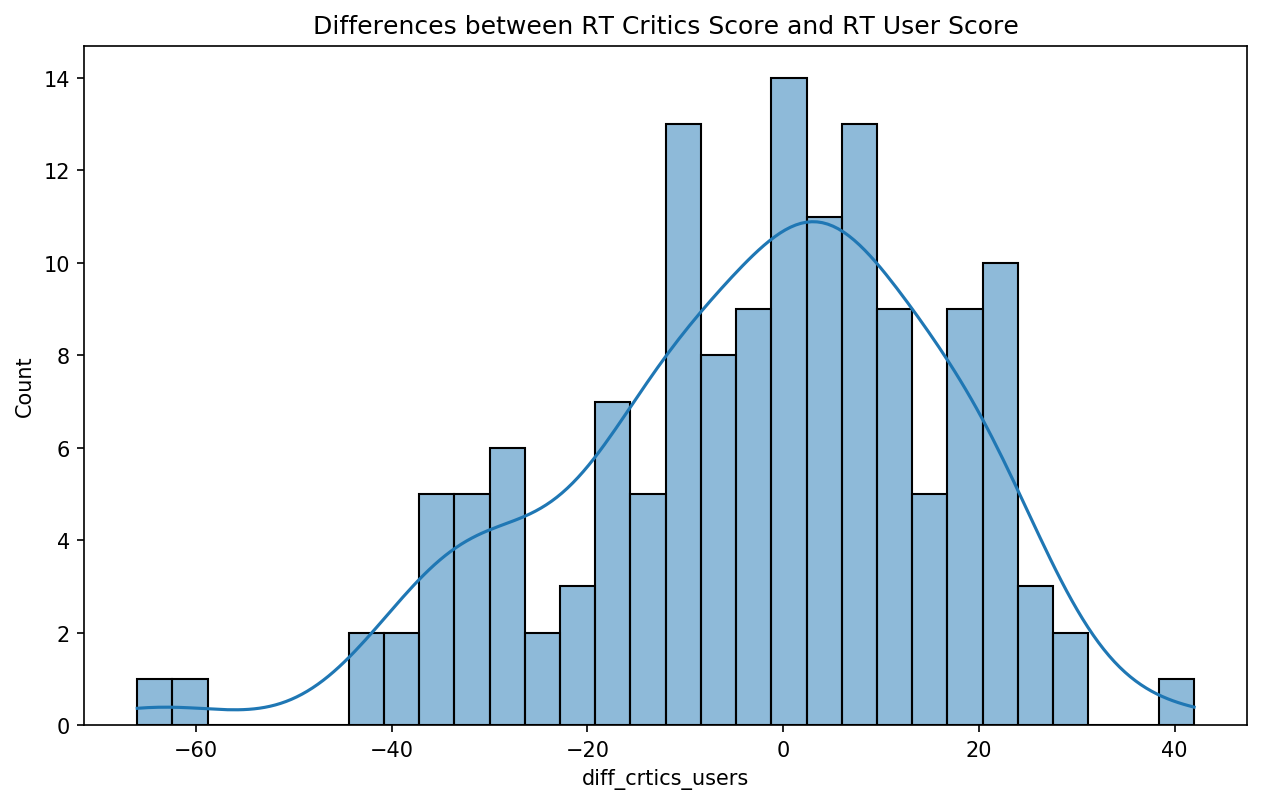

In [32]:
# Plot differences between RT Critics Score and RT User Score Histogram + EDA
plt.figure(figsize = (10, 6), dpi = 150)
sns.histplot(x = 'diff_crtics_users', data = all_sites, kde = True, bins=30)
plt.title("Differences between RT Critics Score and RT User Score");

**Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

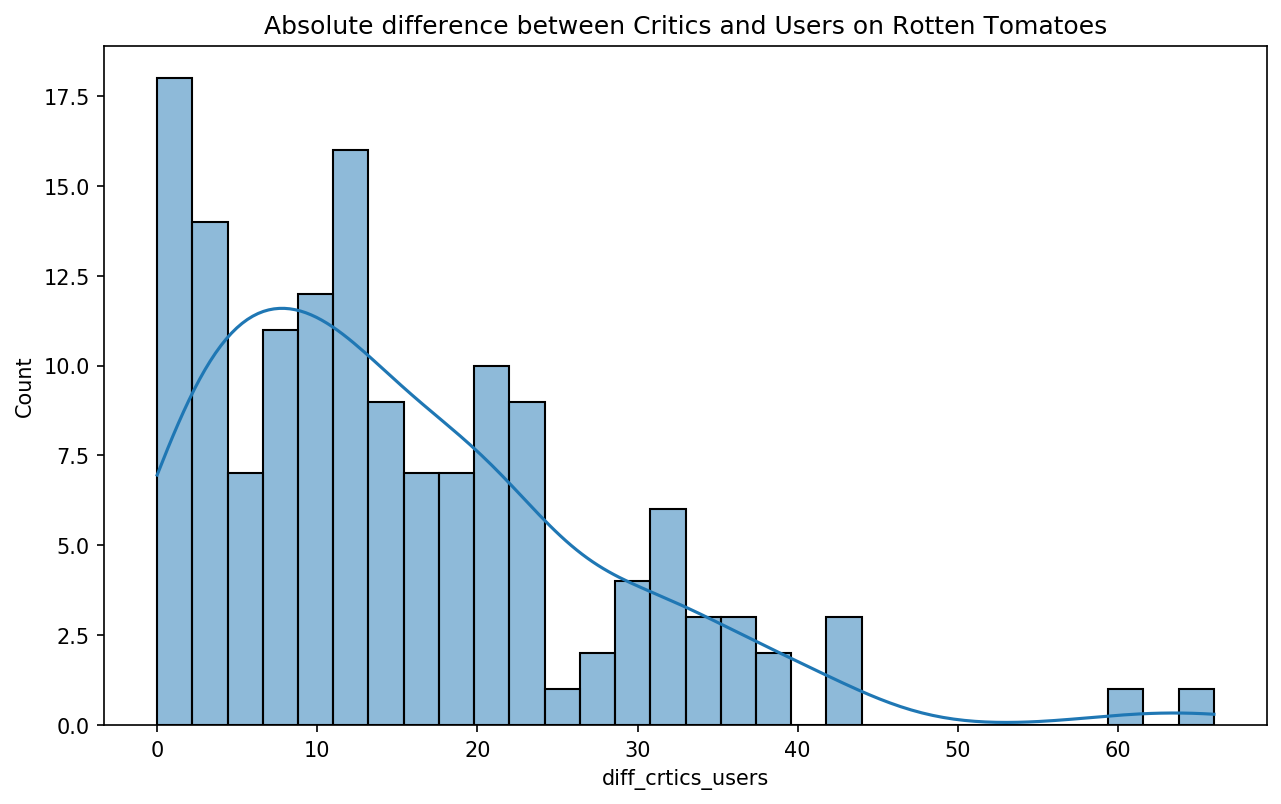

In [33]:
# Plot distribution the absolute difference between Critics and Users on Rotten Tomatoes
dcu = all_sites['diff_crtics_users'].apply(abs)
plt.figure(figsize = (10, 6), dpi = 150)
sns.histplot(x = dcu, data = all_sites, kde = True, bins=30)
plt.title("Absolute difference between Critics and Users on Rotten Tomatoes");

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**What are the top 5 movies users rated higher than critics on average:**

In [34]:
# top 5 movies users rated higher than critics on average
all_sites.nsmallest(5, 'diff_crtics_users')[['FILM','diff_crtics_users']]

,FILM,diff_crtics_users
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Now show the top 5 movies critics scores higher than users on average.**

In [35]:
# top 5 movies users rated higher than critics on average
all_sites.nlargest(5, 'diff_crtics_users')[['FILM','diff_crtics_users']]

,FILM,diff_crtics_users
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

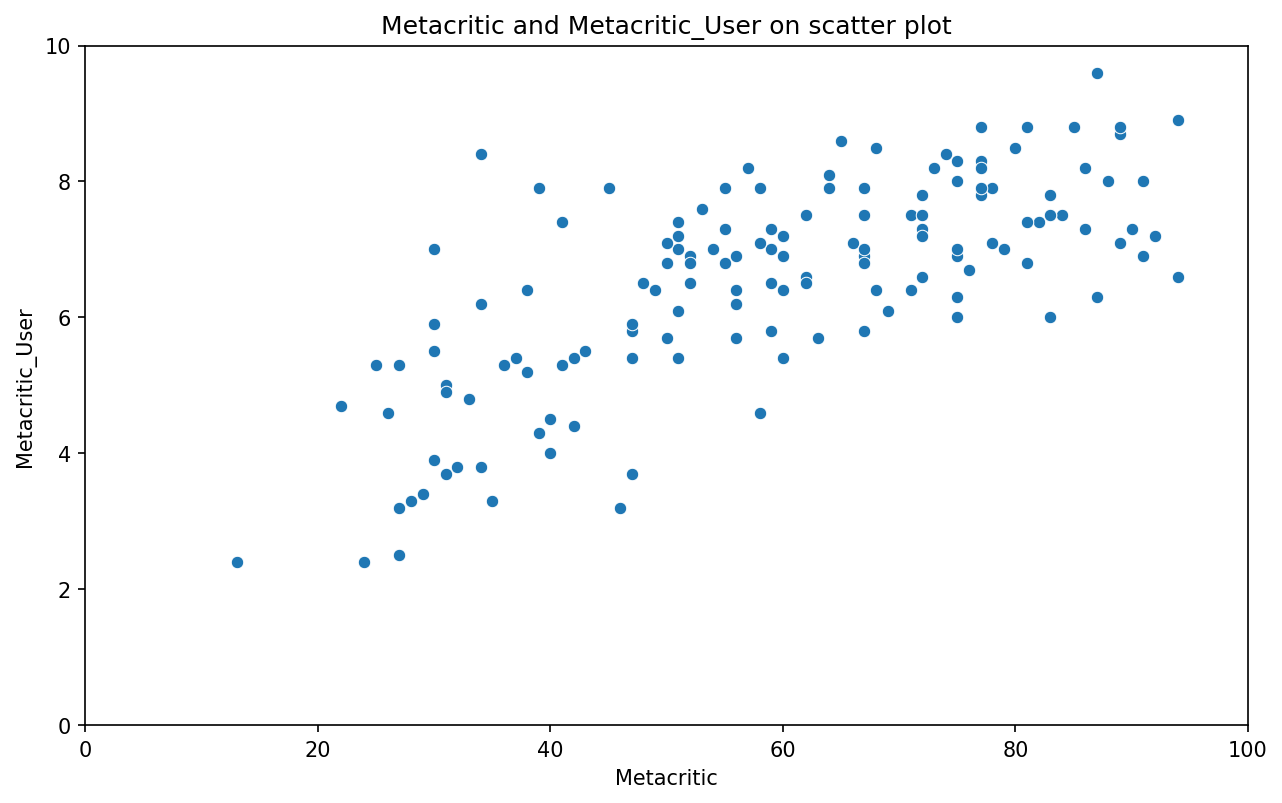

In [36]:
# Metacritic and Metacritic_User on scatter plot
plt.figure(figsize = (10, 6), dpi = 150)
sns.scatterplot(x = 'Metacritic', y = 'Metacritic_User', data = all_sites, )
plt.xlim(0, 100)
plt.ylim(0, 10)
plt.title('Metacritic and Metacritic_User on scatter plot');

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

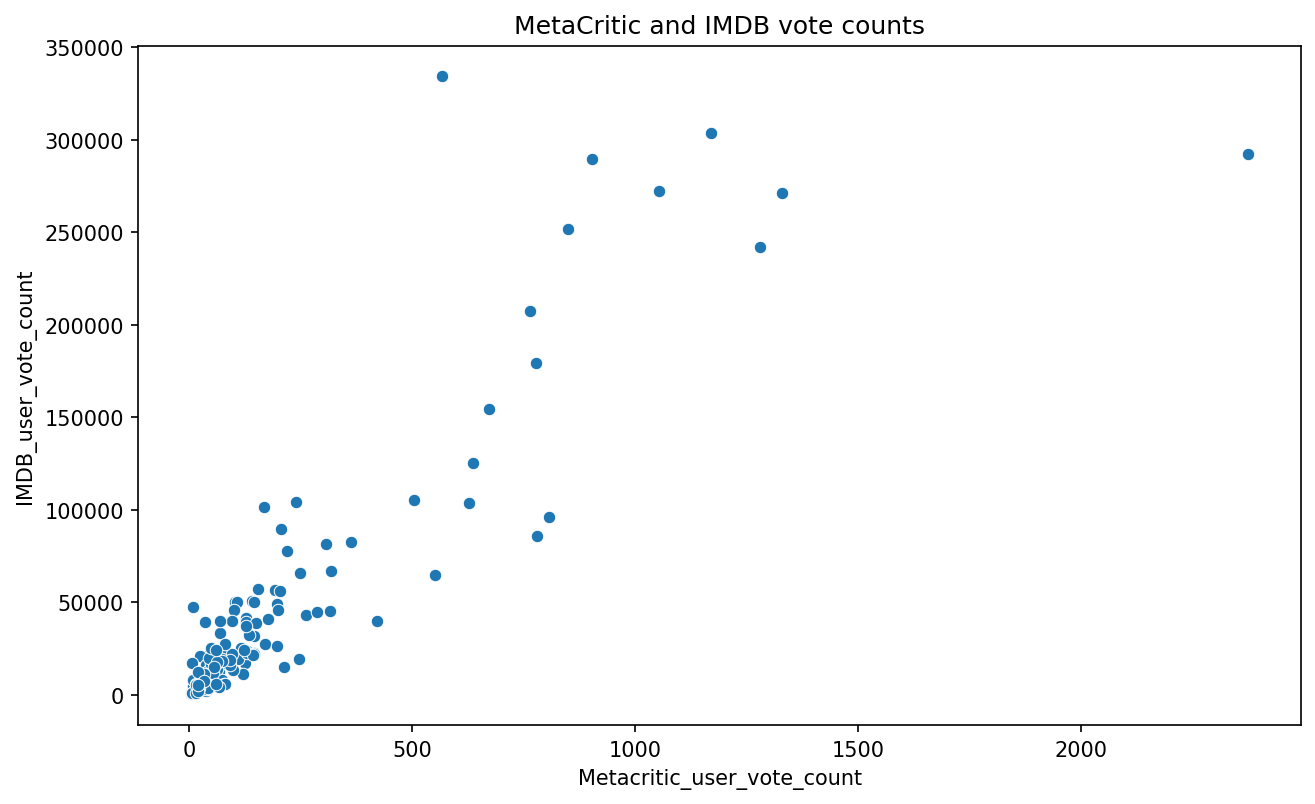

In [37]:
# Metacritic_user_vote_count & IMDB_user_vote_count on scatter plot
plt.figure(figsize = (10, 6), dpi = 150)
sns.scatterplot(x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count', data = all_sites)
plt.title('MetaCritic and IMDB vote counts');

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**What movie has the highest IMDB user vote count?**

In [38]:
# IMDB_user_vote_count with high votes
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_crtics_users
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**What movie has the highest Metacritic User Vote count?**

In [39]:
# Metacritic_user_vote_count with high votes
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_crtics_users
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [40]:
# Combine fandango and all_sites;  typr = inner;    based on: Film column
df = pd.merge(fandango, all_sites ,how='inner', on = 'FILM')

In [41]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_crtics_users
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  diff_crtics_users           145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [43]:
df.head(1)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_crtics_users
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17


In [44]:
# Normalize Scores 

# First Normalize Rotten Tomatos (critics):
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
# Now Rotten Tomatos Users:
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)


# Second Normalize Metacritics (critics):
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
#Now Metacritic Users:
df['metaU_Norm'] = np.round(df['Metacritic_User']/2,1)

# Thirdly
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [45]:
#Test above cell
# np.round(df['IMDB']/2,1)

In [46]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_crtics_users,RT_Norm,RTU_Norm,Meta_Norm,metaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [47]:
# Norm_scores DataFrame that only contains the normalizes ratings
Norm = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'metaU_Norm', 'IMDB_Norm']]

In [48]:
Norm.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,metaU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**NOW: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

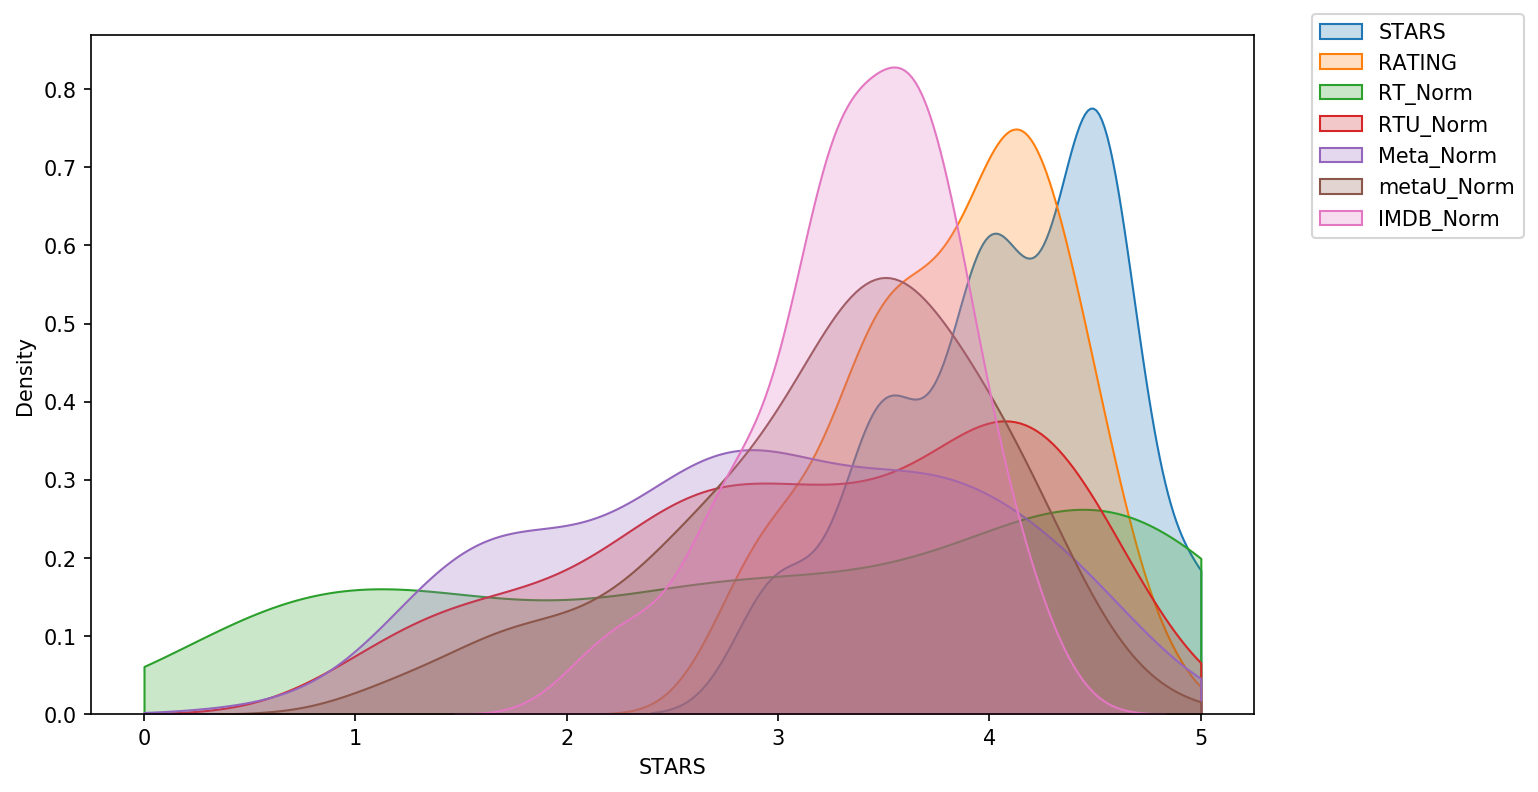

In [49]:
# Comparing the distributions of normalized ratings across all sites with KDE Plot
plt.figure(figsize = (10, 6), dpi = 150)
# 1.Stars
sns.kdeplot(data = Norm, x = 'STARS', clip = [0, 5], fill = True, label = 'STARS')
# 2.Rating
sns.kdeplot(data = Norm, x = 'RATING', clip = [0, 5], fill = True, label = 'RATING')
# 3.RT_Norm
sns.kdeplot(data = Norm, x = 'RT_Norm', clip = [0, 5], fill = True, label = 'RT_Norm')
# 4.RTU_Norm
sns.kdeplot(data = Norm, x = 'RTU_Norm', clip = [0, 5], fill = True, label = 'RTU_Norm')
# 5.Meta_Norm
sns.kdeplot(data = Norm, x = 'Meta_Norm', clip = [0, 5], fill = True, label = 'Meta_Norm')
# 6.metaU_Norm
sns.kdeplot(data = Norm, x = 'metaU_Norm', clip = [0, 5], fill = True, label = 'metaU_Norm')
# 7.IMDB_Norm
sns.kdeplot(data = Norm, x = 'IMDB_Norm', clip = [0, 5], fill = True, label = 'IMDB_Norm')

plt.legend(loc = (1.05, 0.7));

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

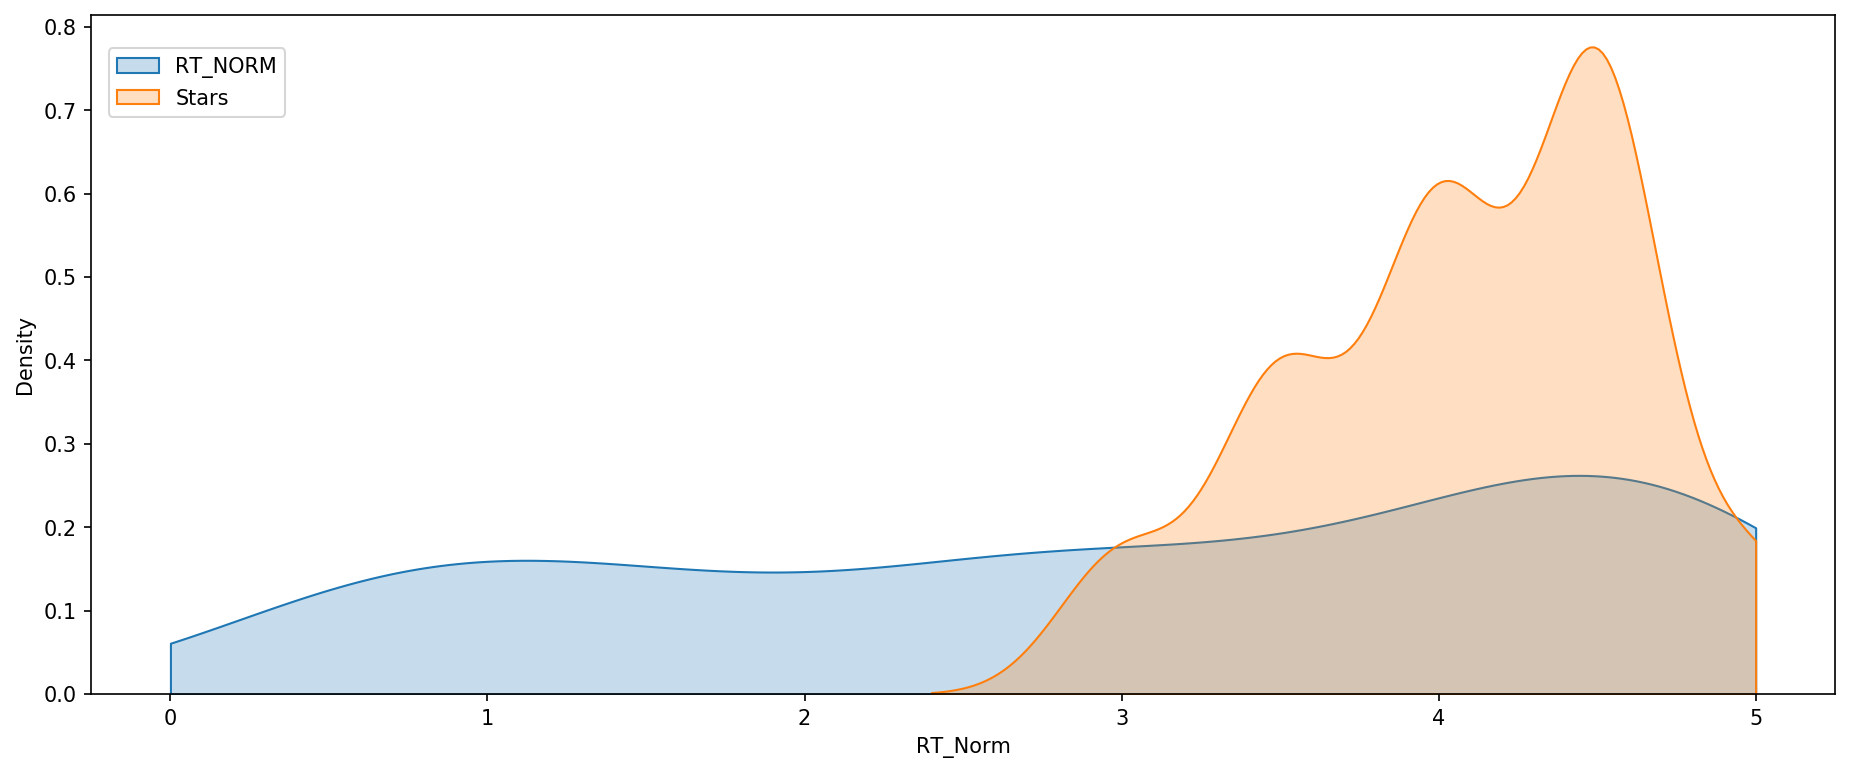

In [64]:
# KDE plot RT critic ratings against the STARS
plt.figure(figsize = (15, 6), dpi = 150)
sns.kdeplot(data = Norm, x = 'RT_Norm', clip = [0, 5], label = 'RT_NORM', fill = True)
sns.kdeplot(data = Norm, x = 'STARS', clip = [0, 5], label = 'Stars', fill = True)
plt.legend(loc =(0.01, 0.85));

**NOW: Create a histplot comparing all normalized scores.**

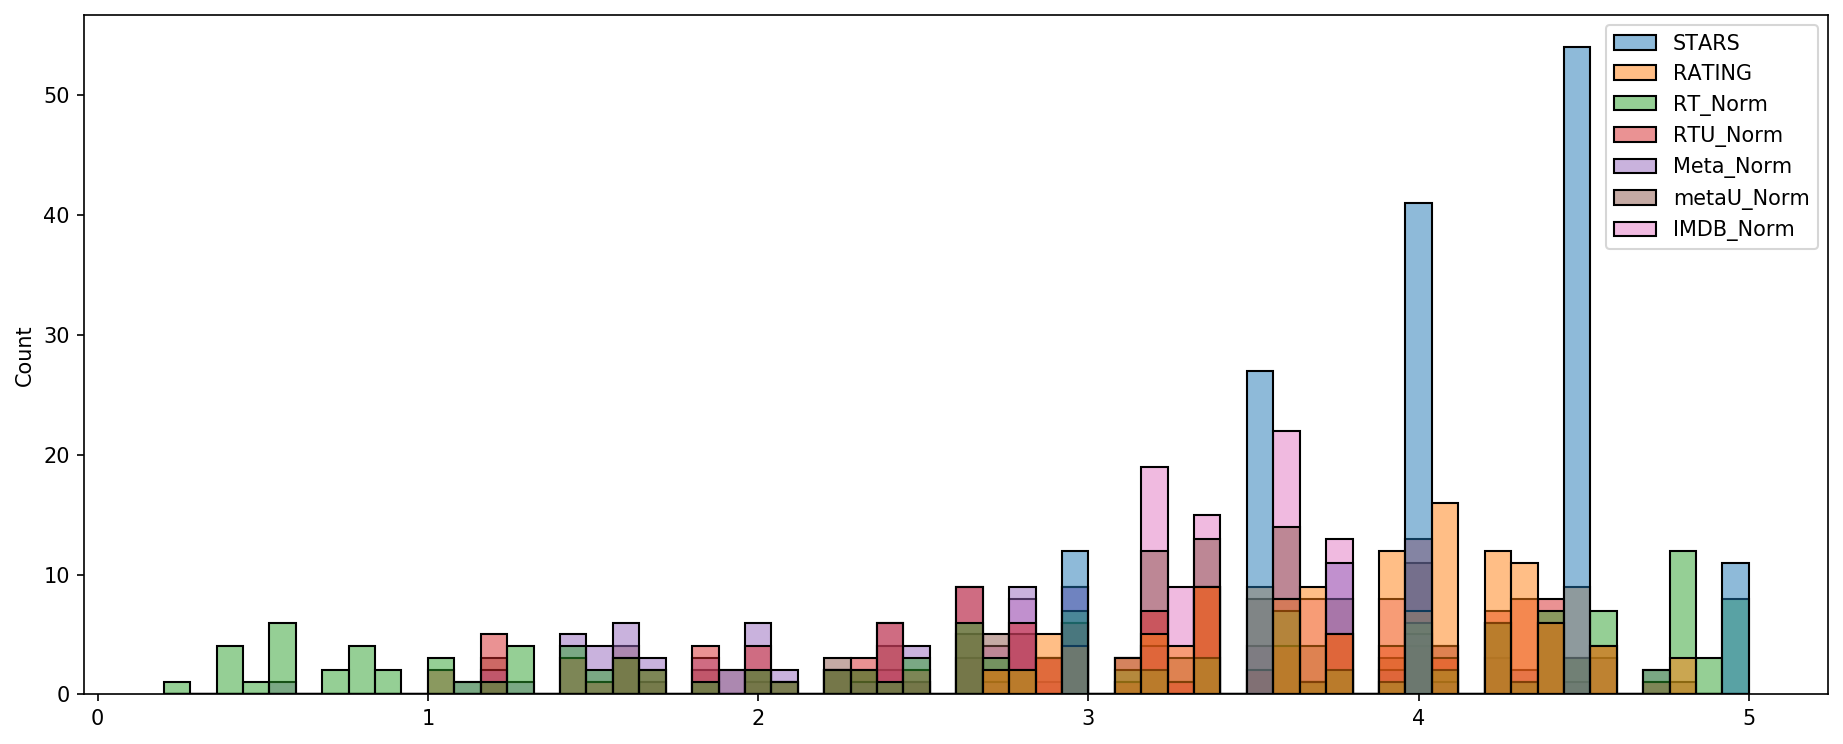

In [69]:
# Create a histplot comparing all normalized scores
plt.subplots(figsize = (15, 6), dpi = 150)
sns.histplot(data = Norm, bins=60);


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

In [ ]:
# CODE HERE

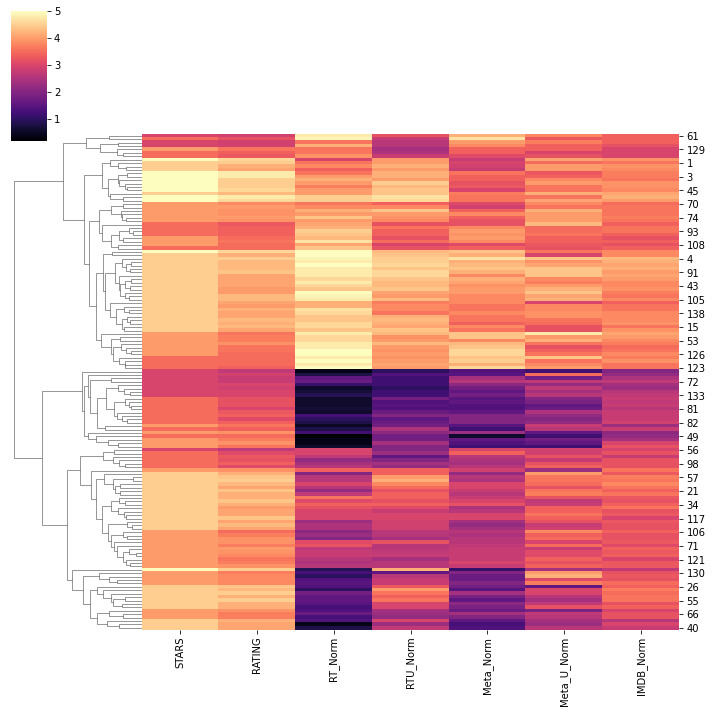

**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [245]:
# CODE HERE

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

In [ ]:
# CODE HERE

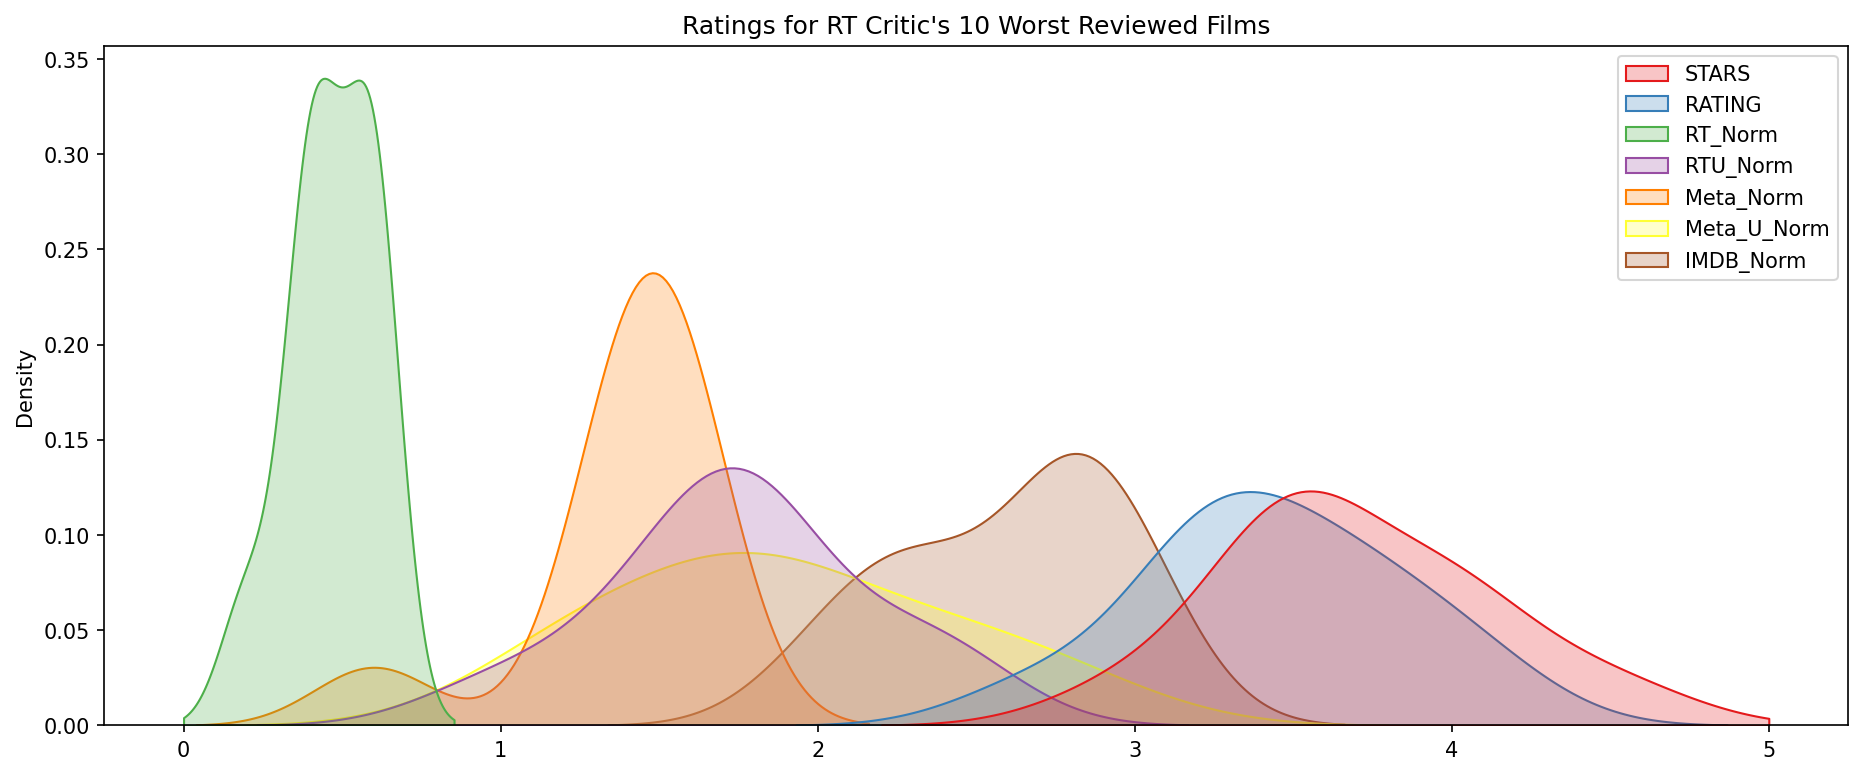

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [254]:
0.4+2.3+1.3+2.3+3

9.3

In [255]:
9.3/5

1.86

----